# Introducción/ *Introduction*


El desafío de la clasificación de texto multi-clase radica en la complejidad inherente del lenguaje natural y la diversidad de temas que pueden abordarse en cualquier conjunto de datos. A través del aprendizaje automático, especialmente utilizando técnicas como redes neuronales, máquinas de soporte vectorial y algoritmos de aprendizaje profundo, se busca capacitar a los modelos para entender patrones lingüísticos y contextuales, permitiéndoles realizar predicciones precisas sobre la categoría a la que pertenece un texto determinado.

Este campo tiene aplicaciones significativas en una variedad de sectores, desde la clasificación de correos electrónicos y la detección de sentimientos en redes sociales hasta la organización automática de grandes bases de datos de documentos. A medida que la cantidad de información textual sigue creciendo exponencialmente, la clasificación de texto multi-clase se posiciona como una herramienta esencial para aprovechar el poder del aprendizaje automático y proporcionar soluciones eficientes y efectivas en la interpretación y gestión del vasto universo de datos textuales.

*The challenge of multi-class text classification lies in the inherent complexity of natural language and the diversity of topics that can be addressed in any dataset. Through machine learning, especially utilizing techniques such as neural networks, support vector machines, and deep learning algorithms, the aim is to train models to understand linguistic and contextual patterns, enabling them to make accurate predictions about the category to which a specific text belongs.*

*This field has significant applications across various sectors, from classifying emails and detecting sentiments on social media to automatically organizing large databases of documents. As the amount of textual information continues to grow exponentially, multi-class text classification emerges as an essential tool to harness the power of machine learning and provide efficient and effective solutions in the interpretation and management of the vast universe of textual data. *

## Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


## Dataset

**Descripción de las columnas**

Descripción de Atributos:

reviewerID - ID del revisor, por ejemplo, A2SUAM1J3GNN3B

asin - ID del producto, por ejemplo, 0000013714

reviewerName - nombre del revisor

helpful - calificación de utilidad de la reseña, por ejemplo, 2/3

reviewText - texto de la reseña

overall - calificación del producto

summary - resumen de la reseña

unixReviewTime - tiempo de la reseña (tiempo Unix)

reviewTime - tiempo de la reseña (sin procesar)

***Attribute Description:***

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

helpful - helpfulness rating of the review, e.g. 2/3

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

In [2]:
df = pd.read_csv("Musical_instruments_reviews.csv")

In [3]:
df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"


In [4]:
df = df.drop(columns= ['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime','reviewTime','summary'])

In [5]:
df.rename(columns={'reviewText': 'Text'}, inplace=True)

## Nulls and duplicates

In [6]:
df.isnull().sum()

Text       7
overall    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
duplicated = df.duplicated()
duplicated.sum()

0

In [ ]:
# df = df.drop_duplicates().reset_index(drop=True)

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10254 entries, 0 to 10260
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Text     10254 non-null  object 
 1   overall  10254 non-null  float64
dtypes: float64(1), object(1)
memory usage: 240.3+ KB


In [10]:
df.shape

(10254, 2)

In [11]:
df.describe()

,overall
count,10254.000000
mean,4.488492
std,0.894849
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
df['overall'].value_counts()

overall
5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

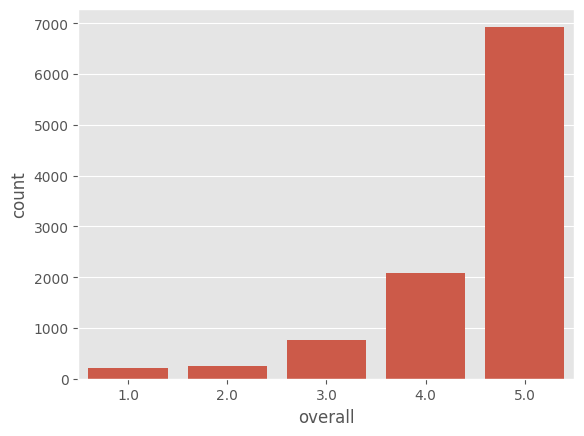

In [13]:
sns.countplot(df, x="overall")

Podemos comprobar que tenemos un set de datos desbalanceados, donde la mayoria de las etiquetas corresponden a la calificación 5.

*We can see that we have an imbalanced dataset, where the majority of the labels correspond to the rating 5.*

*Word Cloud:*

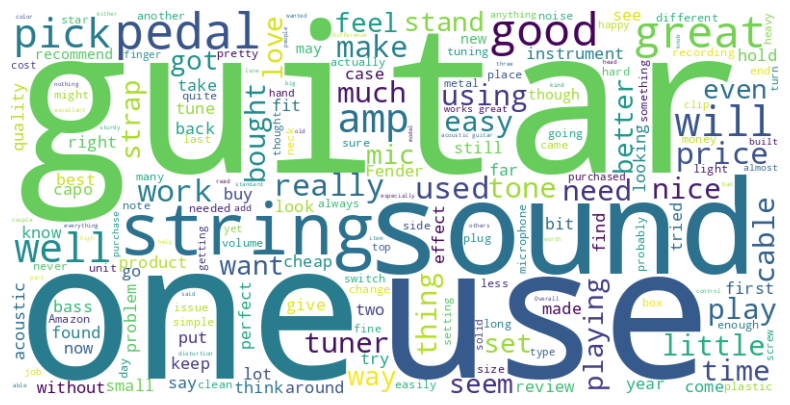

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Text'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cómo se ven los textos en algunas categoria:

*How texts look in some categories:*

In [15]:
print(f"overall: '5.0', Text:\n{df.loc[df.overall == 5.0].sample(1)[['Text']].to_string(index=False)}")
print('-----------------------------------------------------------------------------------------------------\n')
print(f"overall: '3.0', Text:\n{df.loc[df.overall == 3.0].sample(1)[['Text']].to_string(index=False)}")
print('-----------------------------------------------------------------------------------------------------\n')
print(f"overall: '1.0', Text:\n{df.loc[df.overall == 1.0].sample(1)[['Text']].to_string(index=False)}")
print('-----------------------------------------------------------------------------------------------------\n')

overall: '5.0', Text:
                                                                                                                                                                                                                                                                                                                        Text
It is strange how few fingerboard lubrication products there are that work well and don't build up, stink, or cost too much.I use this on all my household's guitars and basses. Works excellently, application from this bottle is good though occasionally needs a stir and shake to get more lubricant on the applicator.
-----------------------------------------------------------------------------------------------------

overall: '3.0', Text:
                                                                                                                                                                   Text
the hole at the end where you hook it up gets worn 

# Preprocesamiento/ *Preprocessing*

Balancearemos un poco la frecuencia de las distintas calificaciones:

*We will balance the frequency of the different ratings a bit:*

In [16]:
df["overall"] = df["overall"].apply(lambda stars: "Positive" if stars in [4,5] else "Negative" if stars in [1,2] else "Neutral")

<Axes: xlabel='overall', ylabel='count'>

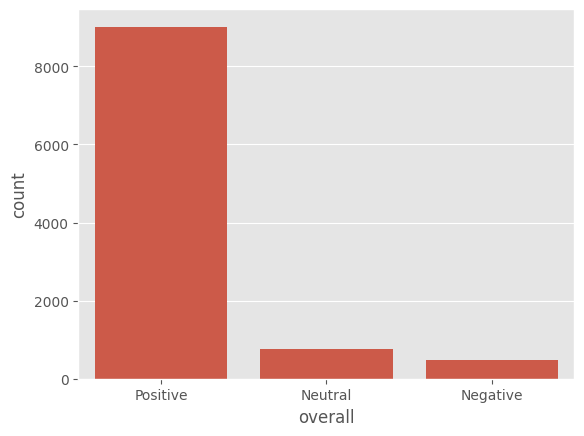

In [17]:
sns.countplot(df, x="overall")

In [18]:
df['overall'].value_counts()

overall
Positive    9015
Neutral      772
Negative     467
Name: count, dtype: int64

In [19]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Expresiones regulares para la limpieza de texto
space = re.compile('[/(){}\[\]\|@,;]')
symbols = re.compile('[^0-9a-z #+_]')

# Conjunto de stopwords en inglés
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    # Convertir el texto a minúsculas
    text = text.lower()

    # Reemplazar símbolos especificados con espacio
    text = space.sub(' ', text)

    # Eliminar símbolos que no estén en el conjunto [0-9a-z #+_]
    text = symbols.sub('', text)

    # Eliminar 'x'
    text = text.replace('x', '')

    # Eliminar stopwords
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)

    return text


In [21]:
X = df['Text'].apply(clean_text)

In [22]:
y = pd.get_dummies(df['overall'],columns=df["overall"]).values
y

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [23]:
df.head()

,Text,overall
0,"Not much to write about here, but it does exac...",Positive
1,The product does exactly as it should and is q...,Positive
2,The primary job of this device is to block the...,Positive
3,Nice windscreen protects my MXL mic and preven...,Positive
4,This pop filter is great. It looks and perform...,Positive


## Data Split

In [26]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test_t, y_train, y_test_t = train_test_split(X, y, test_size = 0.3, random_state = 15)
X_val, X_test, y_val, y_test =  train_test_split(X_test_t,y_test_t, test_size = 0.5)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X val: {X_val.shape}")
print(f"y val: {y_val.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (7177,)
y train: (7177, 3)
X val: (1538,)
y val: (1538, 3)
X test: (1539,)
y test: (1539, 3)


# TF-IDF (Term Frequency-Inverse Document Frequency)

La representación TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica utilizada en procesamiento de lenguaje natural y recuperación de información para convertir texto en una representación numérica que captura la importancia relativa de las palabras o términos en un documento en un corpus más amplio. Esta representación se utiliza comúnmente en tareas como clasificación de texto, recuperación de información, análisis de texto y agrupamiento.

Frecuencia de Término (TF - Term Frequency):

TF mide la frecuencia con la que un término específico (palabra) aparece en un documento. Cuanto más a menudo aparece un término en un documento, mayor será su puntuación de TF para ese documento. TF se calcula generalmente como el número de veces que un término aparece en un documento dividido por el número total de términos en ese documento. Frecuencia de Documento Inversa (IDF - Inverse Document Frequency):

IDF mide la importancia de un término en un corpus de documentos más amplio. Cuanto más común es un término en todo el corpus, menor será su puntuación de IDF. IDF se calcula como el logaritmo del número total de documentos en el corpus dividido por el número de documentos que contienen el término. La fórmula del IDF se ve así: IDF = log(N / (n + 1)), donde N es el número total de documentos en el corpus y n es el número de documentos que contienen el término. TF-IDF:

La puntuación de TF-IDF combina las dos métricas anteriores. Se calcula multiplicando la puntuación de TF por la puntuación de IDF para cada término en un documento. El resultado es que los términos que son frecuentes en un documento pero raros en otros obtienen una puntuación alta de TF-IDF. Los términos que son frecuentes en todos los documentos obtienen una puntuación baja de TF-IDF. El objetivo es identificar términos que sean importantes y específicos para un documento en lugar de términos comunes que aparezcan en todos los documentos. La representación TF-IDF tiene varias ventajas:

Ayuda a resaltar términos importantes en un documento. Reduce la influencia de palabras comunes que no aportan mucha información. Es útil en tareas de clasificación de texto, recuperación de información y agrupamiento. Sin embargo, es importante destacar que TF-IDF es solo una de las muchas técnicas de representación de texto en NLP. La elección de la técnica adecuada depende de la tarea específica y los datos en cuestión. En algunas aplicaciones, se pueden utilizar representaciones más avanzadas, como modelos de lenguaje pre-entrenados (por ejemplo, Word2Vec, GloVe o modelos basados en transformers) para capturar relaciones semánticas más complejas entre palabras.

*TF-IDF (Term Frequency-Inverse Document Frequency) representation is a technique used in natural language processing and information retrieval to convert text into a numerical representation that captures the relative importance of words or terms in a document within a larger corpus. This representation is commonly used in tasks such as text classification, information retrieval, text analysis, and clustering.*

***Term Frequency (TF):***

*TF measures how often a specific term (word) appears in a document. The more frequently a term appears in a document, the higher its TF score for that document. TF is usually calculated as the number of times a term appears in a document divided by the total number of terms in that document.*

***Inverse Document Frequency (IDF):***

*IDF measures the importance of a term in a broader corpus of documents. The more common a term is across the entire corpus, the lower its IDF score. IDF is calculated as the logarithm of the total number of documents in the corpus divided by the number of documents containing the term. The IDF formula looks like this: IDF = log(N / (n + 1)), where N is the total number of documents in the corpus, and n is the number of documents containing the term.*

***TF-IDF:***

*The TF-IDF score combines the two aforementioned metrics. It is calculated by multiplying the TF score by the IDF score for each term in a document. As a result, terms that are frequent in one document but rare in others receive a high TF-IDF score. Terms that are common across all documents receive a low TF-IDF score. The goal is to identify terms that are important and specific to a document rather than common terms appearing in all documents.*

*TF-IDF representation has several advantages:*

*1. It helps highlight important terms in a document.*
*2. It reduces the influence of common words that don't contribute much information.*
*3. It is useful in text classification, information retrieval, and clustering tasks.*

*However, it's important to note that TF-IDF is just one of many text representation techniques in NLP. The choice of the appropriate technique depends on the specific task and data at hand. In some applications, more advanced representations such as pre-trained language models (e.g., Word2Vec, GloVe, or transformer-based models) may be used to capture more complex semantic relationships between words.*

## Stop Words

En el procesamiento del lenguaje natural, una palabra stop es una palabra que se usa con frecuencia y que no aporta información significativa al significado de un texto. Las palabras stop suelen ser artículos, preposiciones, conjunciones y adverbios.

El paquete NLTK tiene un conjunto definido de palabras clave para diferentes idiomas, como el inglés. Aquí, nos enfocaremos en las palabras clave en inglés. También se pueden considerar palabras clave adicionales si es necesario.

*In natural language processing, a stop word is a frequently used word that does not contribute significant information to the meaning of a text. Stop words are typically articles, prepositions, conjunctions, and adverbs.*

*The NLTK package has a defined set of stop words for different languages, such as English. Here, we will focus on English stop words. Additional stop words can also be considered if necessary.*

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df = 3,  max_features= 5000,
            strip_accents = 'unicode', analyzer = 'word', token_pattern = r'\w{1,}',
            ngram_range = (1, 3), use_idf = 1, smooth_idf = 1,sublinear_tf = 1,
            # stop_words = 'english'
)


In [33]:
import pickle
pickle.dump(tfv, open('countVectorizer.pkl', 'wb'))

Explicación de los parámetros:

min_df=3: Este parámetro establece el número mínimo de documentos en los que un término debe aparecer para ser considerado en el modelo. En este caso, un término debe aparecer al menos en 3 documentos.

max_features=None: Este parámetro establece el número máximo de características (términos) que se deben tener en cuenta. Aquí se ha establecido en None, lo que significa que no hay un límite máximo en la cantidad de características.

strip_accents='unicode': Elimina acentos y diacríticos durante la etapa de preprocesamiento.

analyzer='word': Analiza el texto a nivel de palabra.

token_pattern=r'\w{1,}': Utiliza esta expresión regular para seleccionar tokens. En este caso, se seleccionan palabras de al menos un carácter de longitud.

ngram_range=(1, 3): Considera tanto unigramas (términos individuales) como bigramas y trigramas (secuencias de dos y tres términos consecutivos, respectivamente).

use_idf=1: Habilita el cálculo de la ponderación TF-IDF.

smooth_idf=1: Aplica suavizado a la ponderación IDF para evitar divisiones por cero.

sublinear_tf=1: Aplica la escala sublineal a la frecuencia del término en la matriz TF.

stop_words='english': Utiliza una lista predefinida de palabras vacías en inglés para filtrarlas durante el procesamiento.

## *TF-IDF transformation*

In [34]:
# Converting text into numerical features using the TF-IDF representation
X_train_tfidf = tfv.fit_transform(X_train)
X_val_tfidf = tfv.transform(X_val)

# Base Models for text classification

La idea es trazar un recorrido de menor a mayor, desde aquellos modelos iniciales y más sencillos hasta llegar, en capitulos más avanzados, a las arquitecturas más modernas de "transferencia de aprendizaje" a partir de la revolución de los transformers.


## Simple Logistic Regression (with auto-balance class weights)

La regresión logística es una de las herramientas analíticas más importantes en las ciencias sociales y naturales. En el procesamiento del lenguaje natural, la regresión logística es el algoritmo base de aprendizaje supervisado para la clasificación y también tiene una relación muy estrecha con las redes neuronales. Una red neuronal puede considerarse como una serie de clasificadores de regresión logística apilados uno encima del otro.
La regresión logística se puede utilizar para clasificar una observación en una de dos clases (como 'sentimiento positivo' y 'sentimiento negativo'), o en una de muchas clases.

*Logistic regression is one of the most important analytic tools in the social *and natural sciences. In natural language processing, logistic regression is * the baseline supervised machine learning algorithm for classification, and also has a very close relationship with neural networks. A neural network can be viewed as a series of logistic regression classifiers stacked on top of*
*each other. Logistic regression can be used to classify an observation into one of two classes (like ‘positive sentiment’ and ‘negative sentiment’), or into one of many classes.*

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error


In [36]:
# Convierte las etiquetas one-hot a un array unidimensional
y_train_unid = np.argmax(y_train, axis=1)

# Initialize the model
model = LogisticRegression(class_weight='balanced')

# Train the model on the training data
model.fit(X_train_tfidf, y_train_unid)

# Make predictions on the validation set
y_valid_pred = model.predict(X_val_tfidf)

# Convierte las etiquetas one-hot a un array unidimensional
y_val_unid = np.argmax(y_val, axis=1)

# Calcula la exactitud y el error cuadrático medio
accuracy = accuracy_score(y_val_unid, y_valid_pred)
MSE = mean_squared_error(y_val_unid, y_valid_pred)

# Muestra las métricas
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {MSE}')


Accuracy: 0.8003901170351105
Mean Squared Error: 0.3381014304291287


In [37]:
class_rep = classification_report(y_val_unid, y_valid_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.33      0.35      0.34        80
           1       0.19      0.37      0.25       109
           2       0.93      0.86      0.90      1349

    accuracy                           0.80      1538
   macro avg       0.49      0.53      0.50      1538
weighted avg       0.85      0.80      0.82      1538



In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes y_val_unidimensional e y_valid_pred

# Calcula la precisión promedio
precision_avg = precision_score(y_val_unid, y_valid_pred, average='macro')

# Calcula recall_score
recall_avg = recall_score(y_val_unid, y_valid_pred, average='macro')

# Calcula f1_score
f1_score_avg = f1_score(y_val_unid, y_valid_pred, average='macro')


In [39]:
LR_acc = accuracy
LR_MSE = MSE
LR_presicion_average = precision_avg
LR_recall_average = recall_avg
LR_f1_average = f1_score_avg

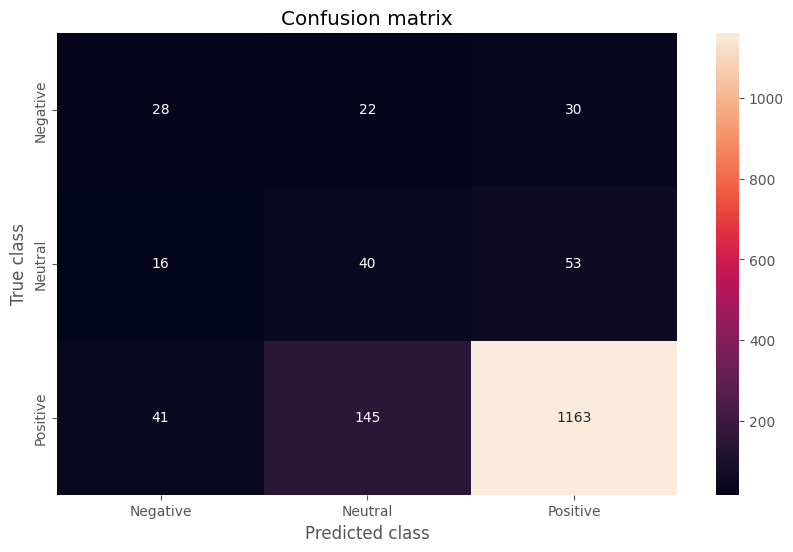

In [40]:
# medimos los resultados en una matriz de confusión
clases = ["Negative", "Neutral", "Positive"]
conf_matrix = confusion_matrix(y_val_unid, y_valid_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=clases, yticklabels=clases);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Logistic Regression (GSearch for class weights)

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

# Supongamos que tienes X_train_tfidf, y_train (one-hot encoded), X_val_tfidf, y_val (one-hot encoded)

# Convierte las etiquetas one-hot a un array unidimensional
y_train_unid = np.argmax(y_train, axis=1)
y_val_unid = np.argmax(y_val, axis=1)

# Inicializa el modelo de regresión logística
model = LogisticRegression()

# Definir los parámetros que deseas ajustar en la búsqueda de cuadrícula
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0: 1.0 - x, 1: x / 2, 2: x / 2} for x in weights]}

# Realiza la búsqueda de cuadrícula
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_result = grid_search.fit(X_train_tfidf, y_train_unid)

# Imprime los mejores parámetros encontrados
best_params = grid_result.best_params_
print("Best Parameters:")
print(best_params)




Best Parameters:
{'class_weight': {0: 0.8258793969849246, 1: 0.08706030150753769, 2: 0.08706030150753769}}


In [42]:
# Entrena el modelo con los mejores parámetros en el conjunto de entrenamiento
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_tfidf, y_train_unid)

# Realiza predicciones en el conjunto de validación
y_valid_pred = best_model.predict(X_val_tfidf)

# Calcula métricas de evaluación
accuracy = accuracy_score(y_val_unid, y_valid_pred)
MSE = mean_squared_error(y_val_unid, y_valid_pred)

# Muestra las métricas
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {MSE}')

Accuracy: 0.8836150845253576
Mean Squared Error: 0.252925877763329


In [43]:
class_rep = classification_report(y_val_unid, y_valid_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.51      0.25      0.34        80
           1       0.00      0.00      0.00       109
           2       0.89      0.99      0.94      1349

    accuracy                           0.88      1538
   macro avg       0.47      0.41      0.43      1538
weighted avg       0.81      0.88      0.84      1538



In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Supongamos que ya tienes y_val_unidimensional e y_valid_pred

# Calcula la precisión promedio
precision_avg = precision_score(y_val_unid, y_valid_pred, average='macro')

# Calcula recall_score
recall_avg = recall_score(y_val_unid, y_valid_pred, average='macro')

# Calcula f1_score
f1_score_avg = f1_score(y_val_unid, y_valid_pred, average='macro')

In [45]:
LR_GS_acc = accuracy
LR_GS_MSE = MSE
LR_GS_presicion_average = precision_avg
LR_GS_recall_average = recall_avg
LR_GS_f1_average = f1_score_avg



## Save model

In [ ]:
import pickle

In [ ]:
pickle.dump(best_model, open('LogReg_mode.pkl', 'wb'))

## Naive Bayes

El clasificador Naive Bayes se basa en el Teorema de Bayes, que es un teorema fundamental en estadísticas y probabilidad. El Teorema de Bayes se utiliza para calcular la probabilidad condicional de un evento basándose en la probabilidad de otro evento relacionado.

In [46]:
from sklearn.naive_bayes import MultinomialNB

# Convierte las etiquetas one-hot a un array unidimensional
y_train_unid = np.argmax(y_train, axis=1)

# Initialize and train the Multinomial Naive Bayes model
naive_bayes = MultinomialNB(fit_prior=False)
naive_bayes.fit(X_train_tfidf, y_train_unid)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_val_tfidf)

# Convierte las etiquetas one-hot a un array unidimensional
y_val_unid = np.argmax(y_val, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_val_unid, y_pred)
MSE = mean_squared_error (y_val_unid, y_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"MSE: {MSE:.2f}")

Validation Accuracy: 0.87
MSE: 0.25


In [47]:
class_rep = classification_report(y_val_unid, y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.61      0.14      0.22        80
           1       0.24      0.13      0.17       109
           2       0.90      0.97      0.93      1349

    accuracy                           0.87      1538
   macro avg       0.58      0.41      0.44      1538
weighted avg       0.84      0.87      0.84      1538



In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcula la precisión promedio
precision_avg = precision_score(y_val_unid, y_pred, average='macro')

# Calcula recall_score
recall_avg = recall_score(y_val_unid, y_pred, average='macro')

# Calcula f1_score
f1_score_avg = f1_score(y_val_unid, y_pred, average='macro')

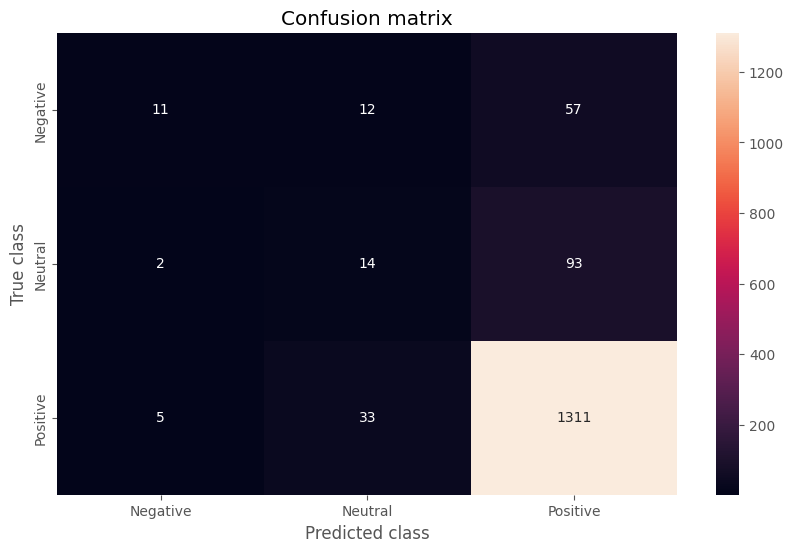

In [49]:
# medimos los resultados en una matriz de confusión
clases = ["Negative", "Neutral", "Positive"]
conf_matrix = confusion_matrix(y_val_unid, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=clases, yticklabels=clases);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [50]:
NB_acc = accuracy
NB_MSE = MSE
NB_presicion_average = precision_avg
NB_recall_average = recall_avg
NB_f1_average = f1_score_avg

## Support Vector Classification (SVC)

Este algoritmo se basa en el concepto de "vectores de soporte", que son muestras de datos que se encuentran más cerca de la frontera de decisión y desempeñan un papel crucial en la determinación de la ubicación del hiperplano. SVC puede manejar datos no lineales utilizando transformaciones de kernel, lo que permite clasificar datos que no son linealmente separables en el espacio original.

En el contexto de procesamiento de lenguaje natural (NLP), SVC es un algoritmo que se utiliza para tareas de clasificación de texto, como la categorización de documentos, detección de spam, análisis de sentimientos y más. Puede ser una elección efectiva cuando se trabaja con datos de alta dimensionalidad, como matrices TF-IDF de términos de palabras en documentos de texto.

In [51]:
from sklearn.svm import SVC

# Convierte las etiquetas one-hot a un array unidimensional
y_train_unid = np.argmax(y_train, axis=1)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', class_weight='balanced')  # You can choose different kernels like 'linear', 'rbf', or 'poly'
svm_classifier.fit(X_train_tfidf, y_train_unid)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_val_tfidf)

# Convierte las etiquetas one-hot a un array unidimensional
y_val_unid = np.argmax(y_val, axis=1)


# Evaluate the model
accuracy = accuracy_score(y_val_unid, y_pred)
MSE = mean_squared_error (y_val_unid, y_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"MSE: {MSE:.2f}")

classification_rep = classification_report(y_val_unid, y_pred)
print("Classification Report:\n", classification_rep)

Validation Accuracy: 0.80
MSE: 0.34
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.30      0.33        80
           1       0.19      0.39      0.26       109
           2       0.93      0.86      0.89      1349

    accuracy                           0.80      1538
   macro avg       0.49      0.51      0.49      1538
weighted avg       0.84      0.80      0.82      1538



In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcula la precisión promedio
precision_avg = precision_score(y_val_unid, y_pred, average='macro')

# Calcula recall_score
recall_avg = recall_score(y_val_unid, y_pred, average='macro')

# Calcula f1_score
f1_score_avg = f1_score(y_val_unid, y_pred, average='macro')

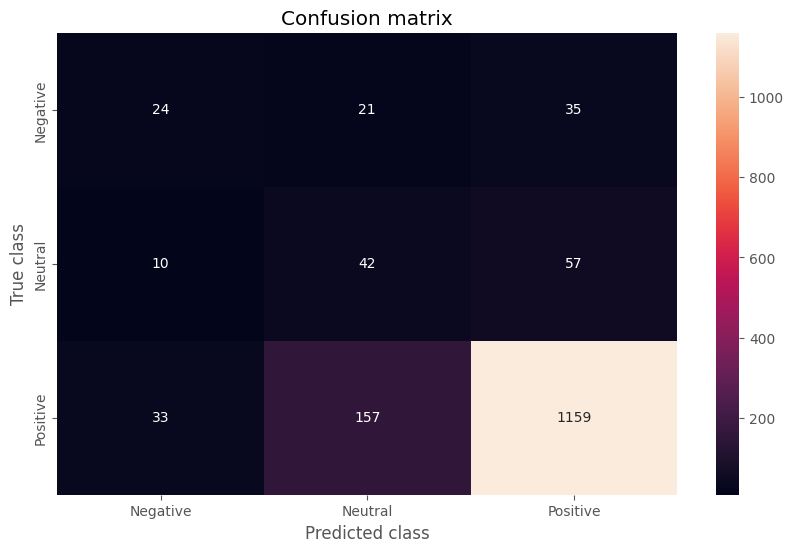

In [53]:
# medimos los resultados en una matriz de confusión
clases = ["Negative", "Neutral", "Positive"]
conf_matrix = confusion_matrix(y_val_unid, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=clases, yticklabels=clases);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [54]:
SVC_acc = accuracy
SVC_MSE = MSE
SVC_presicion_average = precision_avg
SVC_recall_average = recall_avg
SVC_f1_average = f1_score_avg

## LGBMClassifier

In [55]:
from collections import Counter
# count examples in each class
counter = Counter(df['overall'])
# estimate scale_pos_weight value
estimate = counter['Positive'] / counter['Neutral'] + counter['Negative']
print('Estimate scale pos weight: %.3f' % estimate)

Estimate scale pos weight: 478.677


In [56]:
from lightgbm import LGBMClassifier


model = LGBMClassifier(n_estimators = 130,
                            n_jobs = 4,
                       scale_pos_weight = 478)

# Convierte las etiquetas one-hot a un array unidimensional
y_train_unid = np.argmax(y_train, axis=1)

model.fit(X_train_tfidf, y_train_unid)

#predicting
y_pred = model.predict(X_val_tfidf)

# Convierte las etiquetas one-hot a un array unidimensional
y_val_unid = np.argmax(y_val, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_val_unid, y_pred)
MSE = mean_squared_error (y_val_unid, y_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"MSE: {MSE:.2f}")

classification_rep = classification_report(y_val_unid, y_pred)
print("Classification Report:\n", classification_rep)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.144800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79963
[LightGBM] [Info] Number of data points in the train set: 7177, number of used features: 2518
[LightGBM] [Info] Start training from score -3.110316
[LightGBM] [Info] Start training from score -2.581527
[LightGBM] [Info] Start training from score -0.128112
Validation Accuracy: 0.88
MSE: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.10      0.17        80
           1       0.41      0.13      0.20       109
           2       0.89      0.99      0.94      1349

    accuracy                           0.88      1538
   macro avg       0.66      0.41      0.44      1538
weighted avg       0.85      0.88      0.85      1538



In [57]:
# Calcula la precisión promedio
precision_avg = precision_score(y_val_unid, y_pred, average='macro')

# Calcula recall_score
recall_avg = recall_score(y_val_unid, y_pred, average='macro')

# Calcula f1_score
f1_score_avg = f1_score(y_val_unid, y_pred, average='macro')

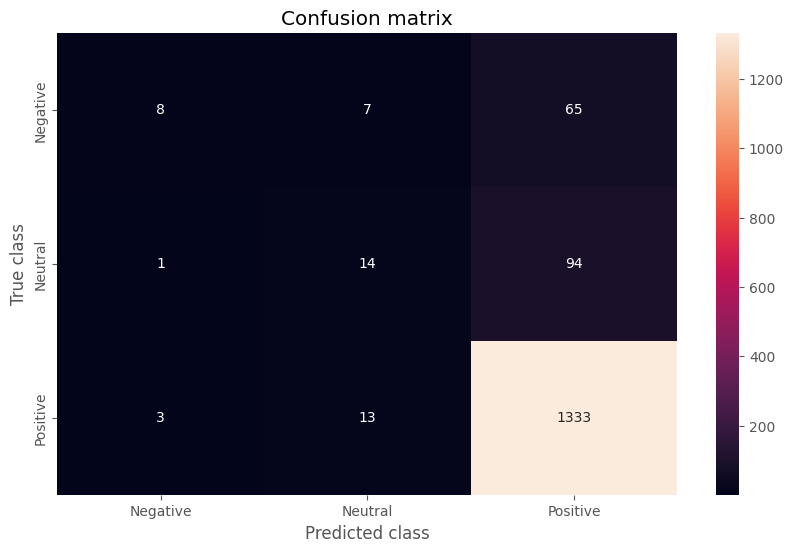

In [58]:
# medimos los resultados en una matriz de confusión
clases = ["Negative", "Neutral", "Positive"]
conf_matrix = confusion_matrix(y_val_unid, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=clases, yticklabels=clases);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [59]:
LGBM_acc = accuracy
LGBM_MSE = MSE
LGBM_presicion_average = precision_avg
LGBM_recall_average = recall_avg
LGBM_f1_average = f1_score_avg

## XGBClassifier

In [60]:
import xgboost as xgb

# Convierte las etiquetas one-hot a un array unidimensional
y_train_unid = np.argmax(y_train, axis=1)


# Crear un clasificador XGBoost
model = xgb.XGBClassifier (num_class = 5,  n_jobs = 4, n_estimators=100, max_depth = 3, scale_pos_weight = 478, random_state = 42)

model.fit(X_train_tfidf, y_train_unid)

#predicting
y_pred = model.predict(X_val_tfidf)

# Convierte las etiquetas one-hot a un array unidimensional
y_val_unid = np.argmax(y_val, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_val_unid, y_pred)
MSE = mean_squared_error (y_val_unid, y_pred)

print(f"Validation Accuracy: {accuracy:.2f}")
print(f"MSE: {MSE:.2f}")

classification_rep = classification_report(y_val_unid, y_pred)
print("Classification Report:\n", classification_rep)

Validation Accuracy: 0.89
MSE: 0.24
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.16      0.27        80
           1       0.50      0.06      0.11       109
           2       0.89      1.00      0.94      1349

    accuracy                           0.89      1538
   macro avg       0.75      0.41      0.44      1538
weighted avg       0.86      0.89      0.85      1538



In [61]:
# Calcula la precisión promedio
precision_avg = precision_score(y_val_unid, y_pred, average='macro')

# Calcula recall_score
recall_avg = recall_score(y_val_unid, y_pred, average='macro')

# Calcula f1_score
f1_score_avg = f1_score(y_val_unid, y_pred, average='macro')

In [62]:
XG_acc = accuracy
XG_MSE = MSE
XG_presicion_average = precision_avg
XG_recall_average = recall_avg
XG_f1_average = f1_score_avg

# Conclusión

# Comparative models

In [63]:
data = [
    ['Logistic_Regression', LR_acc, LR_MSE, LR_presicion_average, LR_recall_average, LR_f1_average],
    ['LR with Grid Search', LR_GS_acc, LR_GS_MSE, LR_GS_presicion_average, LR_GS_recall_average, LR_GS_f1_average],
    ['Naive_Bayes', NB_acc, NB_MSE, NB_presicion_average, NB_recall_average, NB_f1_average],
     ['Support_Vector_Classification', SVC_acc, SVC_MSE, SVC_presicion_average, SVC_recall_average, SVC_f1_average],
     ['LGBM_Classifier',LGBM_acc, LGBM_MSE, LGBM_presicion_average, LGBM_recall_average, LGBM_f1_average],
     ['XGB_Classifier',XG_acc, XG_MSE, XG_presicion_average, XG_recall_average, XG_f1_average]
    ]

columns = ['Model', 'Accuracy', 'MSE', 'presicion_average','recall_average','f1_average']

dfModelos = pd.DataFrame(data, columns=columns)


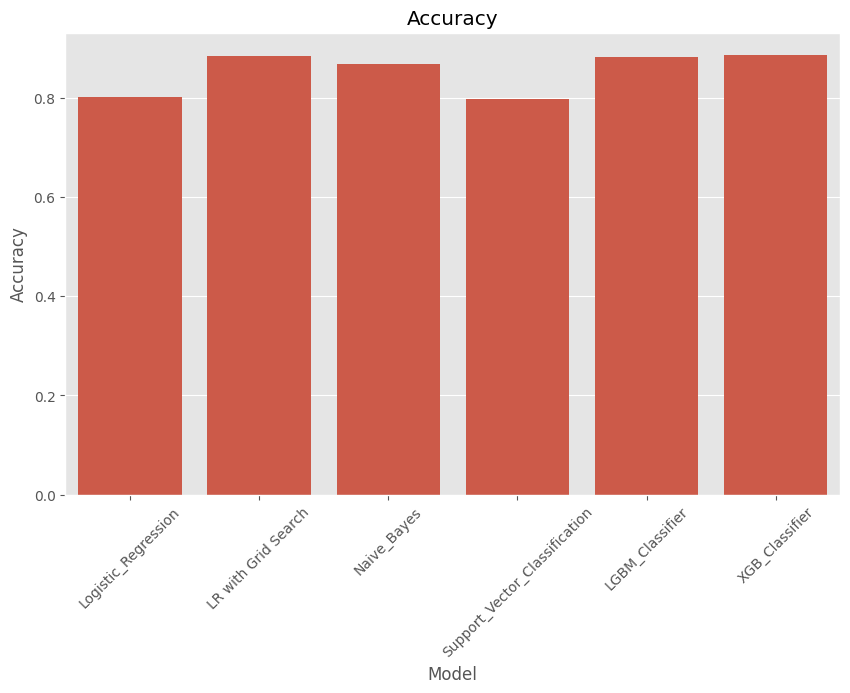

In [64]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(dfModelos, x='Model', y ='Accuracy')
plt.title('Accuracy')
plt.xticks(rotation=45)
plt.show()

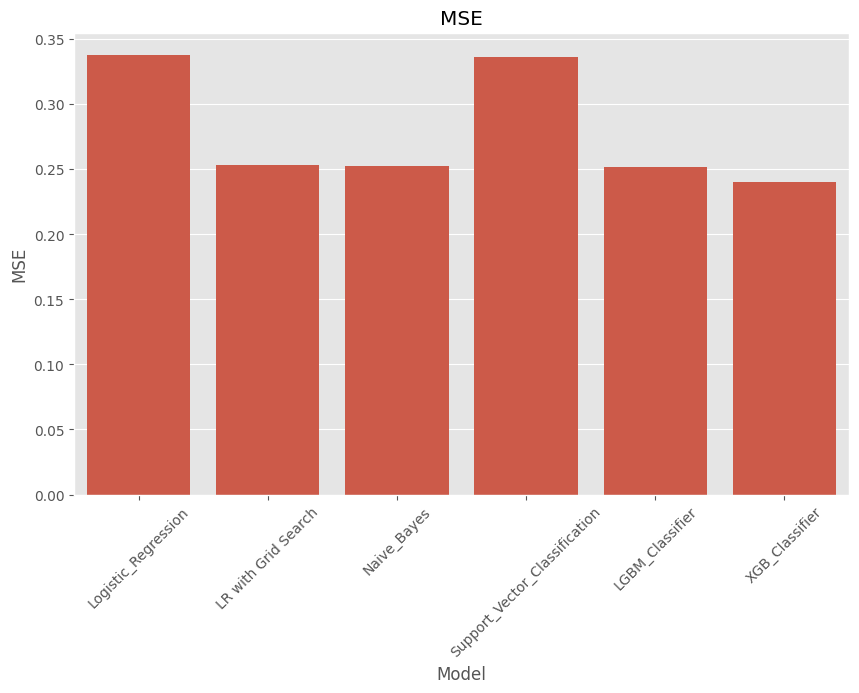

In [65]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(dfModelos, x='Model', y ='MSE')
plt.title('MSE')
plt.xticks(rotation=45)
plt.show()

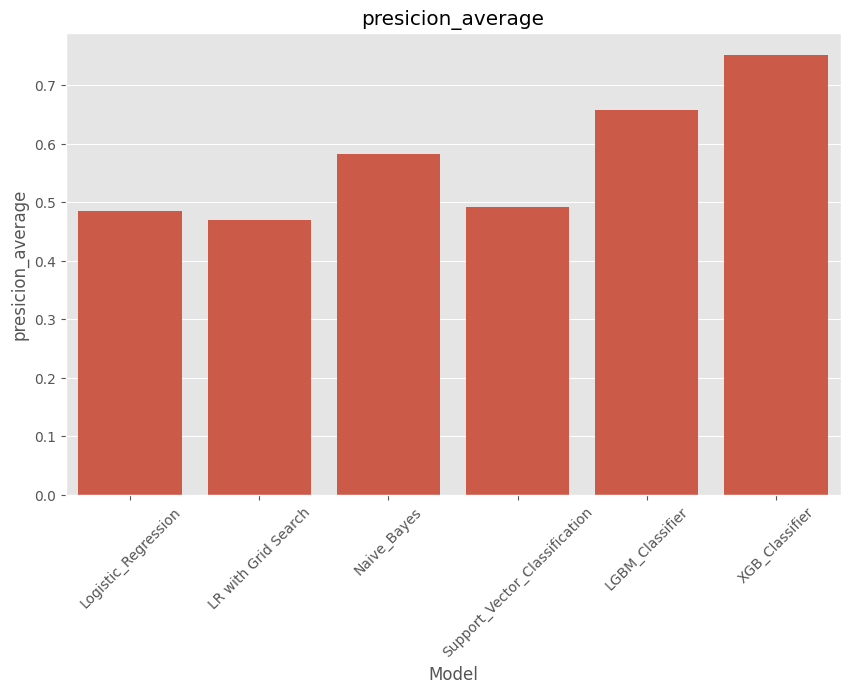

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(dfModelos, x='Model', y ='presicion_average')
plt.title('presicion_average')
plt.xticks(rotation=45)
plt.show()

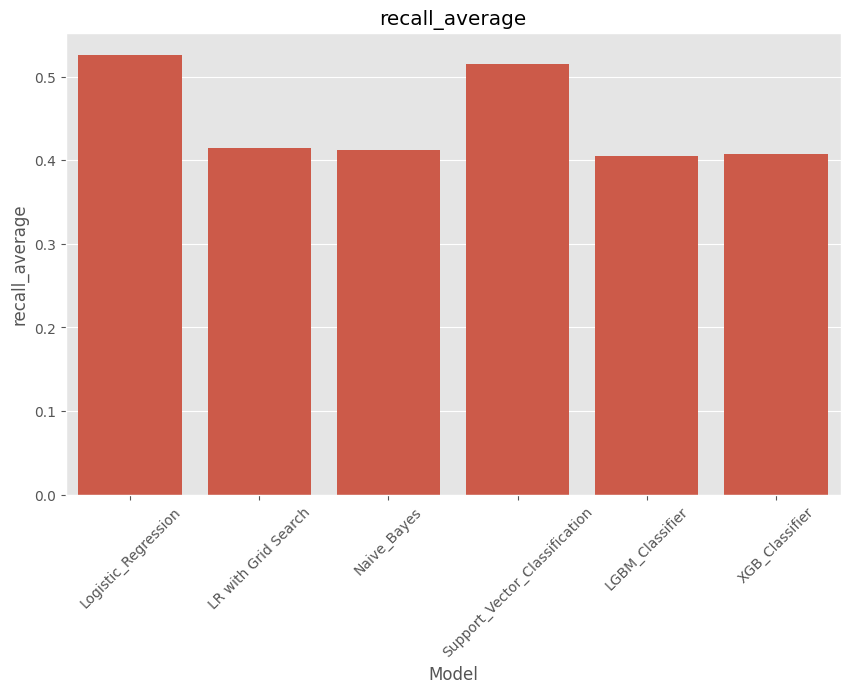

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(dfModelos, x='Model', y ='recall_average')
plt.title('recall_average')
plt.xticks(rotation=45)
plt.show()

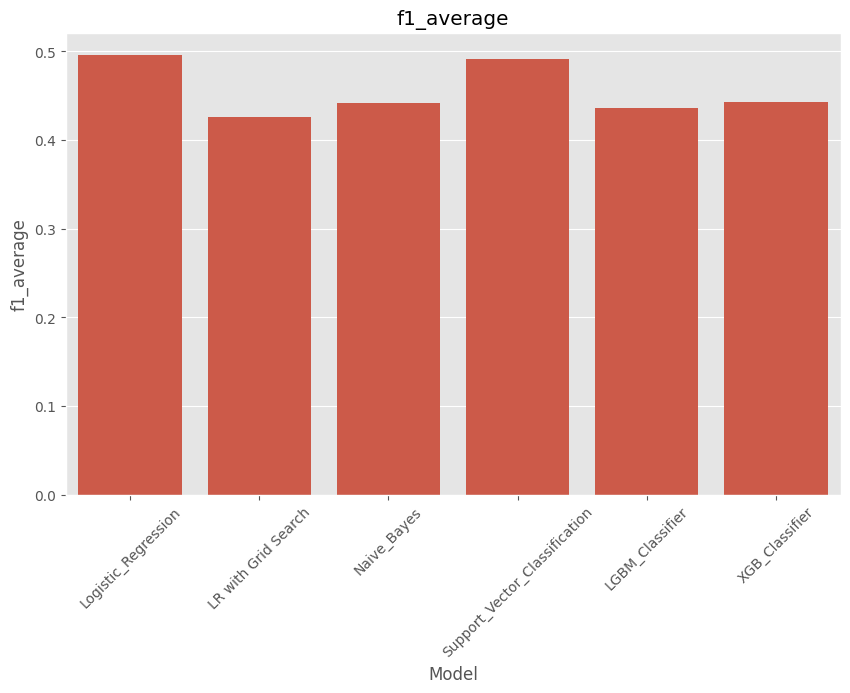

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(dfModelos, x='Model', y ='f1_average')
plt.title('f1_average')
plt.xticks(rotation=45)
plt.show()

# Export dataset

In [ ]:
#We export the df with all the transformations
df_withTransformations = "df_instruments_reviews_withTransformations.csv"

df.to_csv(df_withTransformations, index=True)